# ML for Classification

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
len(df)

7043

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preparation

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [8]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
# totalcharges column has numeric data, which needs to be converted
# errors='coerce' converts the non numeric values to null
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df.totalcharges = df.totalcharges.fillna(0)

In [12]:
# df.isna().sum()

In [13]:
df.churn.value_counts()

no     5174
yes    1869
Name: churn, dtype: int64

In [14]:
# (df.churn == 'yes').astype(int)

In [15]:
# converting yes/no in churn column to 1/0
df.churn = (df.churn == 'yes').astype(int)

## Setting up the Validation Framework

Perform train/test/val split using the Scikit-Learn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
len(df_full_train), len(df_test)

(5634, 1409)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [21]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [24]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [25]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

## EDA

- Check Missing data
- Look at target variable
- Look at numerical and categorical features

Note: We use df_train_full for EDA

In [26]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [27]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [28]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [29]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [30]:
categorical_cols = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod',
]

In [31]:
# no of unique values in each categorical cols
df_full_train[categorical_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [32]:
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

In [33]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Feature Importance: Churn Rate and Risk Ratio

#### Churn Rate

In [34]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [35]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [36]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [37]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [38]:
#1
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] - global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,0.006856
male,0.263214,2838,-0.006755,-0.006755


In [39]:
global_churn_rate

0.26996805111821087

In [40]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [41]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [42]:
churn_nopartner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_nopartner

0.3298090040927694

In [43]:
global_churn_rate - churn_male

0.006754520462819769

In [44]:
global_churn_rate - churn_female

-0.006855983216553063

In [45]:
global_churn_rate - churn_partner

0.06493474245795922

In [46]:
global_churn_rate - churn_nopartner

-0.05984095297455855

In [47]:
# d = global_churn_rate - group_churn_rate 
# if d<0, then more likely to churn
# if d>0, then less likely to churn

#### Risk Ratio

In [48]:
churn_partner/global_churn_rate
# churn rate for ppl with partner is 24% lower

0.7594724924338315

In [49]:
churn_nopartner/global_churn_rate
# churn rate for ppl with partner is 22% higher

1.2216593879412643

In [50]:
# r = group_churn_rate/global_churn_rate 
# if r<1, then less likely to churn
# if r>1, then more likely to churn

In [51]:
churn_male/global_churn_rate

0.9749802969838747

In [52]:
churn_female/global_churn_rate

1.0253955354648652

In [53]:
from IPython.display import display

In [54]:
for c in categorical_cols:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [55]:
# contract and 

## Feature Improtance: Mutual Information

In [56]:
from sklearn.metrics import mutual_info_score

In [57]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [58]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [59]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [60]:
mutual_info_score(df_full_train.churn, df_full_train.internetservice)

0.055867945893496467

In [61]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [62]:
mi = df_full_train[categorical_cols].apply(mutual_info_churn_score)
mi.sort_values(ascending=False) # most important variable has high mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation

In [63]:
# correlation coeff. = pearson correlation coeff
# -1<=r<=1
# find the ranges for r representing low, moderate and strong correlation
# +ve, -ve and zero correlation

In [64]:
numerical_cols

['tenure', 'monthlycharges', 'totalcharges']

In [65]:
df_full_train[numerical_cols].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [66]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [67]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [68]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [69]:
print(df_full_train.monthlycharges.min())
print(df_full_train.monthlycharges.max())

18.25
118.65


In [70]:
print(df_full_train[df_full_train.monthlycharges <= 20].churn.mean())
print(df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean())
print(df_full_train[(df_full_train.monthlycharges > 50) & (df_full_train.monthlycharges <= 90)].churn.mean())
print(df_full_train[df_full_train.monthlycharges > 90].churn.mean())

0.08795411089866156
0.18340943683409436
0.32086450540315875
0.3321351545650611


## One-hot Encoding
Using Scilit-Learn to encode categorical features

In [71]:
categorical_cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [72]:
df_full_train.gender.value_counts()

male      2838
female    2796
Name: gender, dtype: int64

In [73]:
df_full_train.contract.value_counts()

month-to-month    3104
two_year          1344
one_year          1186
Name: contract, dtype: int64

In [74]:
from sklearn.feature_extraction import DictVectorizer

In [75]:
dicts = df_train[['gender', 'contract']].iloc[:50].to_dict(orient='records')

In [76]:
dv = DictVectorizer(sparse=False) # DictVectorizer does not transform numerical columns
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [77]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [78]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [79]:
# sparse matrix ***

In [80]:
train_dicts = df_train[numerical_cols+categorical_cols].to_dict(orient='records')
dv = DictVectorizer(sparse=False) # DictVectorizer does not transform numerical columns
X_train = dv.fit_transform(train_dicts)

In [81]:
list(X_train[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [82]:
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

In [83]:
list(X_val[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 70.85,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 71.0,
 4973.4]

## Logistic Regression
- Binary Regression
- Linear v/s Logistic Regression

In [84]:
# sigmoid function = f(x) = 1/(1+exp(-1))
# 1/(1+np.exp(-x))

In [85]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [86]:
z = np.linspace(-5,5,50)
z

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [87]:
sigmoid(z)

array([0.00669285, 0.00819568, 0.01003256, 0.01227603, 0.01501357,
       0.01835024, 0.0224116 , 0.02734679, 0.03333169, 0.04057176,
       0.04930426, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578244, 0.14998817, 0.17790412, 0.20973382, 0.24555731,
       0.28529068, 0.32865255, 0.37514569, 0.42406149, 0.47451191,
       0.52548809, 0.57593851, 0.62485431, 0.67134745, 0.71470932,
       0.75444269, 0.79026618, 0.82209588, 0.85001183, 0.87421756,
       0.89499941, 0.9126906 , 0.92764204, 0.94020085, 0.95069574,
       0.95942824, 0.96666831, 0.97265321, 0.9775884 , 0.98164976,
       0.98498643, 0.98772397, 0.98996744, 0.99180432, 0.99330715])

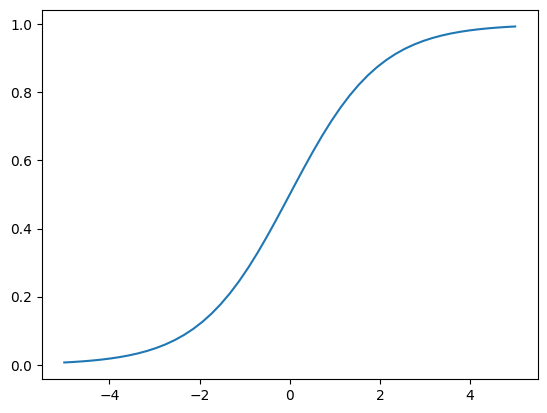

In [88]:
plt.plot(z,sigmoid(z))

In [89]:
# logistoc regression = sigmoid(result of linear regression)

## Training with Logistic Regression using Scikit-Learn

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [92]:
model.coef_

array([[ 4.71652055e-01, -1.71372612e-01, -4.07206253e-01,
        -3.11196746e-02, -7.58071353e-02,  6.20415695e-02,
        -8.96464294e-02, -7.93219500e-02, -3.39246498e-02,
        -7.30021601e-02, -3.29866859e-01,  3.12586478e-01,
        -8.96464294e-02,  3.79488787e-03, -2.54865220e-01,
         1.41473888e-01,  6.46452236e-03,  6.18108359e-02,
        -8.96464294e-02, -7.90912164e-02,  2.60604031e-01,
        -8.96464294e-02, -2.77884411e-01, -2.26830408e-01,
         1.19903598e-01, -1.64297507e-01,  5.73706973e-02,
        -8.58453611e-02, -3.10636731e-02,  6.64965636e-02,
        -5.65143394e-02,  1.41473888e-01, -2.48400698e-01,
         2.12186713e-01, -1.17593319e-01, -8.96464294e-02,
         1.00312939e-01, -6.88051207e-02, -8.96464294e-02,
         5.15247401e-02,  2.08391145e-01, -8.96464294e-02,
        -2.25671525e-01, -6.95481384e-02,  3.71930359e-04]])

In [93]:
model.coef_[0].round(3)

array([ 0.472, -0.171, -0.407, -0.031, -0.076,  0.062, -0.09 , -0.079,
       -0.034, -0.073, -0.33 ,  0.313, -0.09 ,  0.004, -0.255,  0.141,
        0.006,  0.062, -0.09 , -0.079,  0.261, -0.09 , -0.278, -0.227,
        0.12 , -0.164,  0.057, -0.086, -0.031,  0.066, -0.057,  0.141,
       -0.248,  0.212, -0.118, -0.09 ,  0.1  , -0.069, -0.09 ,  0.052,
        0.208, -0.09 , -0.226, -0.07 ,  0.   ])

In [94]:
len(model.coef_[0].round(3))

45

In [95]:
# find the predicted probalities
model.predict_proba(X_val)
# prob of not churning, prob of churning

array([[0.99062312, 0.00937688],
       [0.79363467, 0.20636533],
       [0.78649976, 0.21350024],
       ...,
       [0.85983479, 0.14016521],
       [0.20242622, 0.79757378],
       [0.16534769, 0.83465231]])

In [96]:
model.predict_proba(X_val)[:,1]

array([0.00937688, 0.20636533, 0.21350024, ..., 0.14016521, 0.79757378,
       0.83465231])

In [97]:
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = y_pred >= 0.5

In [98]:
# y_pred[churn_decision]
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 313, dtype: object

In [99]:
np.array([True, False]).mean()

0.5

In [100]:
# Find Accuracy
(y_val == churn_decision).mean()

0.8019872249822569

## Model Interpretation

In [101]:
a = [1,2,3]
b = ['a','b', 'c', 'd']
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [102]:
# shows the weights (w) for each of the feature
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.472,
 'contract=one_year': -0.171,
 'contract=two_year': -0.407,
 'dependents=no': -0.031,
 'dependents=yes': -0.076,
 'deviceprotection=no': 0.062,
 'deviceprotection=no_internet_service': -0.09,
 'deviceprotection=yes': -0.079,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.33,
 'internetservice=fiber_optic': 0.313,
 'internetservice=no': -0.09,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.255,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.006,
 'onlinebackup=no': 0.062,
 'onlinebackup=no_internet_service': -0.09,
 'onlinebackup=yes': -0.079,
 'onlinesecurity=no': 0.261,
 'onlinesecurity=no_internet_service': -0.09,
 'onlinesecurity=yes': -0.278,
 'paperlessbilling=no': -0.227,
 'paperlessbilling=yes': 0.12,
 'partner=no': -0.164,
 'partner=yes': 0.057,
 'paymentmethod=bank_transfer_(automatic)': -0.086,
 'paymentmethod=credit_card_(automatic)': -0.031,
 'paymentmethod=electronic_check': 0.066,
 'pay

### Train a smaller model with fewer features

In [103]:
small = ['contract', 'tenure', 'monthlycharges']

In [104]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [105]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [106]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [107]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [108]:
X_train_small = dv_small.transform(dicts_train_small)

In [109]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [110]:
w0 = model_small.intercept_[0]
w0

-2.477957595128277

In [111]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [112]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [113]:
# sigmoid(sum of (weights*values))

## Using the Model

In [114]:
dicts_full_train = df_full_train[categorical_cols+numerical_cols].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [115]:
dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dicts_full_train)

In [116]:
# X_train_full[:3]

In [117]:
y_full_train = df_full_train.churn.values

In [118]:
model = LogisticRegression()
model.fit(X_train_full, y_full_train)

/opt/homebrew/Caskroom/miniforge/base/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [119]:
dicts_test = df_test[categorical_cols+numerical_cols].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_test = df_test.churn.values

In [120]:
# model.predict_proba(X_test)[:,1]

In [121]:
y_pred = model.predict_proba(X_test)[:,1]

In [122]:
churn_decision = y_pred >= 0.5

In [123]:
(churn_decision == y_test).mean()

0.8140525195173882

In [124]:
customer = dicts_test[14]
customer

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 19,
 'monthlycharges': 19.95,
 'totalcharges': 373.5}

In [125]:
X_customer = dv.transform([customer])

In [126]:
# predict proba for the customer
model.predict_proba(X_customer)[:,1]

array([0.04521923])

In [127]:
# actual value
y_test[14]

0

In [128]:
# so predicted correctly

## Other projects

- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients